# Project 2 (EDA)
### (Разведывательный анализ данных)

## Цель проекта:
#### Подготовка датасета к использованию в модели с предсказыванием (ML)

### Задачи проекта:
1. Проведение первичной обработки данных
2. Устранение выбросов
3. Оценка количества уникальных значений для номинативных переменных
4. Преобразование данных
5. Проведение корреляционного анализа количественных переменных
6. Выявление номинативных переменных, влияющих на предсказываемую величину


#### Импорт библиотек и загрузка датасета

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings
%matplotlib inline

In [2]:
# отображение 100 строк и колонок
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', 100)

In [3]:
stud = pd.read_csv('stud_math.csv')

#### Функции для обработки столбцов датасета

In [4]:
def change_blanks_to_leader(column_name):
    """Функция заменяет пропуски наиболее часто встречающимся значением"""
    stud[column_name].fillna(stud[column_name].value_counts().index[0], inplace=True)
    stud[column_name].value_counts()

def change_blanks_to_none(column_name):
    """Функция заменяет пропуски на None"""
    stud[column_name] = stud[column_name].astype(str).apply(lambda x: None 
                                                            if str(x).strip() == "" or str(x).strip() == "NaN" 
                                                            else x)
    stud[column_name].value_counts()

def checking_object_column(column_name):
    """
    Функция проверяет количество пропусков в колонке и в зависимости от % пропусков вызывает:
    функцию по замене пропусков на наиболее часто встречающийся вариант (если пропусков <10% и есть превалирующий вариант)
    либо функцию по замене пропусков на None
    
    """
    
    print(stud[column_name].value_counts()) # отображение сгруппированного столбца по значениям
    
    count_value = 0 
    for i in range(len(stud[column_name].value_counts())): # подсчет пропусков
        count_value += stud[column_name].value_counts().iloc[i]

    qua_blanks = len(stud[column_name]) - count_value
    percent_blanks = round((qua_blanks / len(stud[column_name]))*100, 1)
    
    print(f"Количество проопусков в столбце: {qua_blanks}")
    print(f"Это ~{percent_blanks}% от общего числа строк")
    
    if percent_blanks < 10 and stud[column_name].value_counts().iloc[0] / stud[column_name].value_counts().iloc[1] > 2:
        print(f'Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением')
        change_blanks_to_leader(column_name)
    elif percent_blanks < 5:
        print(f'Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением')
        change_blanks_to_leader(column_name)
    else:
        print(f'Т.к. пропусков много или/и нет превалирующего варианта, то заменяем пропуски на None')
        change_blanks_to_none(column_name)

## Анализ датасета (каждого столбца по-отдельности)

In [5]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

#### №0, №1 school, sex - Колонки заполнены полностью и согласно условию:

In [6]:
stud.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [7]:
stud.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

#### №2 age - Возраст учеников распределен согласно условию (от 15 до 22)
#### выбросов нет

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

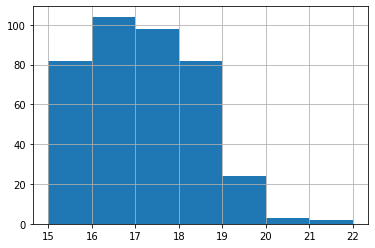

In [8]:
stud.age.hist(bins=7)
stud.age.describe()

#### №3 address - Адрес заполнен согласно условию (U или R), но есть пропуски (17шт).
##### Т.к. есть превалирующий вариант, то пропуски заполним этим значением

In [9]:
checking_object_column('address')

U    295
R     83
Name: address, dtype: int64
Количество проопусков в столбце: 17
Это ~4.3% от общего числа строк
Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением


In [10]:
stud.address.value_counts()

U    312
R     83
Name: address, dtype: int64

#### №4 "famsize" (размер семьи) - Столбец содержит ~7% пропусков (27шт.)
##### Т.к. есть превалирующий вариант, то пропуски заполним этим значением

In [11]:
checking_object_column('famsize')

GT3    261
LE3    107
Name: famsize, dtype: int64
Количество проопусков в столбце: 27
Это ~6.8% от общего числа строк
Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением


In [12]:
stud.famsize.value_counts()

GT3    288
LE3    107
Name: famsize, dtype: int64

#### №5 Столбец "Pstatus" (статус совместного жилья родителей) содержит ~11% пропусков (45шт.)

##### Т.к. пропусков много (>10%), то заполним их None

In [13]:
checking_object_column('Pstatus')

T    314
A     36
Name: Pstatus, dtype: int64
Количество проопусков в столбце: 45
Это ~11.4% от общего числа строк
Т.к. пропусков много или/и нет превалирующего варианта, то заменяем пропуски на None


In [14]:
stud.Pstatus.value_counts()

T      314
nan     45
A       36
Name: Pstatus, dtype: int64

#### №6 Столбец "Medu" (образование матери) содержит ~1% пропусков (3 шт.)

##### Т.к. пропусков мало (<1%) , то заполним заиболее частым значением столбца

In [15]:
checking_object_column('Medu')

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64
Количество проопусков в столбце: 3
Это ~0.8% от общего числа строк
Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением


In [16]:
stud['Medu'].value_counts()

4.0    134
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

#### №7 Столбец "Fedu" (образование отца) содержит 1 выброс (значение не удовлетворяет условию)  и ~6% пропусков (25 шт.)

##### Т.к. пропусков много или/и нет превалирующего варианта, то заменяем пропуски на None

In [17]:
stud['Fedu'].value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [18]:
stud['Fedu'] = stud['Fedu'].apply(lambda x: x if x in range(5) else None)

#### №8 Столбец "Mjob" (работа матери) содержит ~5% пропусков (19 шт.)

##### Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением

In [19]:
checking_object_column('Mjob')

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64
Количество проопусков в столбце: 19
Это ~4.8% от общего числа строк
Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением


In [20]:
stud['Mjob'].value_counts()

other       152
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

#### №9 Столбец "Fjob" (работа отца) содержит ~9% пропусков (36 шт.)

##### Т.к. пропусков много или/и нет превалирующего варианта, то заменяем пропуски на None

In [21]:
checking_object_column('Fjob')

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
Количество проопусков в столбце: 36
Это ~9.1% от общего числа строк
Т.к. пропусков много или/и нет превалирующего варианта, то заменяем пропуски на None


In [22]:
stud['Fjob'].value_counts()

other       197
services    102
nan          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

#### №10 Столбец "reason" (причина выбора школы) содержит ~4% пропусков (17 шт.)

##### Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением

In [23]:
checking_object_column('reason')

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64
Количество проопусков в столбце: 17
Это ~4.3% от общего числа строк
Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением


In [24]:
stud['reason'].value_counts()

course        154
home          104
reputation    103
other          34
Name: reason, dtype: int64

#### №11 Столбец "guardian" (опекун) содержит ~8% пропусков (31 шт.)

##### Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением

In [25]:
checking_object_column('guardian')

mother    250
father     86
other      28
Name: guardian, dtype: int64
Количество проопусков в столбце: 31
Это ~7.8% от общего числа строк
Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением


In [26]:
stud['guardian'].value_counts()

mother    281
father     86
other      28
Name: guardian, dtype: int64

#### №12 Столбец "traveltime" (время в пути до школы) содержит ~7% пропусков (28 шт.)

##### Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением

In [27]:
checking_object_column('traveltime')

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64
Количество проопусков в столбце: 28
Это ~7.1% от общего числа строк
Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением


In [28]:
stud['traveltime'].value_counts()

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

#### №13 Столбец "studytime" (время на учёбу помимо школы в неделю) содержит ~2% пропусков (7 шт.)

##### Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением

In [29]:
checking_object_column('studytime')

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64
Количество проопусков в столбце: 7
Это ~1.8% от общего числа строк
Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением


In [30]:
stud['studytime'].value_counts()

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

#### №14 Столбец "failures" (количество внеучебных неудач) содержит ~6% пропусков (22 шт.)

##### Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением

In [31]:
checking_object_column('failures')

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64
Количество проопусков в столбце: 22
Это ~5.6% от общего числа строк
Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением


In [32]:
stud['failures'].value_counts()

0.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

#### №15 Столбец "schoolsup" (дополнительная образовательная поддержка) содержит ~2% пропусков (9 шт.)

##### Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением

In [33]:
checking_object_column('schoolsup')

no     335
yes     51
Name: schoolsup, dtype: int64
Количество проопусков в столбце: 9
Это ~2.3% от общего числа строк
Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением


In [34]:
stud['schoolsup'].value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

#### №16 Столбец "famsup" (семейная образовательная поддержка) содержит ~10% пропусков (39 шт.)

##### Т.к. пропусков много или/и нет превалирующего варианта, то заменяем пропуски на None

In [35]:
checking_object_column('famsup')

yes    219
no     137
Name: famsup, dtype: int64
Количество проопусков в столбце: 39
Это ~9.9% от общего числа строк
Т.к. пропусков много или/и нет превалирующего варианта, то заменяем пропуски на None


In [36]:
stud['famsup'].value_counts()

yes    219
no     137
nan     39
Name: famsup, dtype: int64

#### №17 Столбец "paid" (дополнительные платные занятия по математике) содержит ~10% пропусков (40 шт.)

##### Т.к. пропусков много или/и нет превалирующего варианта, то заменяем пропуски на None

In [37]:
checking_object_column('paid')

no     200
yes    155
Name: paid, dtype: int64
Количество проопусков в столбце: 40
Это ~10.1% от общего числа строк
Т.к. пропусков много или/и нет превалирующего варианта, то заменяем пропуски на None


In [38]:
stud['paid'].value_counts()

no     200
yes    155
nan     40
Name: paid, dtype: int64

#### №18 Столбец "activities" (дополнительные внеучебные занятия) содержит ~4% пропусков (14 шт.)

##### Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением

In [39]:
checking_object_column('activities')

yes    195
no     186
Name: activities, dtype: int64
Количество проопусков в столбце: 14
Это ~3.5% от общего числа строк
Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением


In [40]:
stud['activities'].value_counts()

yes    209
no     186
Name: activities, dtype: int64

#### №19 Столбец "nursery" (посещал детский сад) содержит ~4% пропусков (16 шт.)

##### Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением

In [41]:
checking_object_column('nursery')

yes    300
no      79
Name: nursery, dtype: int64
Количество проопусков в столбце: 16
Это ~4.1% от общего числа строк
Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением


In [42]:
stud['nursery'].value_counts()

yes    316
no      79
Name: nursery, dtype: int64

#### №20 Столбец "studytime, granular" содержит ~2% пропусков (7 шт.)

##### Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением

In [43]:
checking_object_column('studytime, granular')

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64
Количество проопусков в столбце: 7
Это ~1.8% от общего числа строк
Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением


In [44]:
stud['studytime, granular'].value_counts()

-6.0     201
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

#### №21 Столбец "higher" (хочет получить высшее образование) содержит ~5% пропусков (20 шт.)

##### Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением

In [45]:
checking_object_column('higher')

yes    356
no      19
Name: higher, dtype: int64
Количество проопусков в столбце: 20
Это ~5.1% от общего числа строк
Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением


In [46]:
stud['higher'].value_counts()

yes    376
no      19
Name: higher, dtype: int64

#### №22 Столбец "internet" (наличие интернета дома) содержит ~9% пропусков (34 шт.)

##### Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением

In [47]:
checking_object_column('internet')

yes    305
no      56
Name: internet, dtype: int64
Количество проопусков в столбце: 34
Это ~8.6% от общего числа строк
Т.к. количество пропусков мало и есть превалирующий вариант, то заменяем пропуски самым "популярным" значением


In [48]:
stud['internet'].value_counts()

yes    339
no      56
Name: internet, dtype: int64

#### №23 Столбец "romantic" (в романтических отношениях) содержит ~8% пропусков (31 шт.)

##### Т.к. пропусков много или/и нет превалирующего варианта, то заменяем пропуски на None

In [49]:
checking_object_column('romantic')

no     240
yes    124
Name: romantic, dtype: int64
Количество проопусков в столбце: 31
Это ~7.8% от общего числа строк
Т.к. пропусков много или/и нет превалирующего варианта, то заменяем пропуски на None


In [50]:
stud['romantic'].value_counts()

no     240
yes    124
nan     31
Name: romantic, dtype: int64

#### №24 Столбец "famrel" (семейные отношения) содержит ~7% пропусков (27 шт.) и 1 выброс

##### Т.к. пропусков много или/и нет превалирующего варианта, то заменяем пропуски и выброс на None

In [51]:
stud['famrel'].value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [52]:
# значение, которое необходимо заменить из выборки, т.к. это выброс
stud['famrel'].value_counts().index[-1]

-1.0

In [53]:
stud['famrel'] = stud['famrel'].apply(lambda x: x if x > 0 else None)

In [54]:
stud['famrel'].value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

#### №25 Столбец "freetime" (свободное время после школы) содержит ~3% пропусков (11 шт.)

##### Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением

In [55]:
checking_object_column('freetime')

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64
Количество проопусков в столбце: 11
Это ~2.8% от общего числа строк
Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением


In [56]:
stud['freetime'].value_counts()

3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

#### №26 Столбец "goout" (проведение времени с друзьями) содержит ~2% пропусков (8 шт.)

##### Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением

In [57]:
checking_object_column('goout')

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64
Количество проопусков в столбце: 8
Это ~2.0% от общего числа строк
Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением


In [58]:
stud['goout'].value_counts()

3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

#### №27 Столбец "health" (текущее состояние здоровья) содержит ~4% пропусков (15 шт.)

##### Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением

In [59]:
checking_object_column('health')

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64
Количество проопусков в столбце: 15
Это ~3.8% от общего числа строк
Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски самым "популярным" значением


In [60]:
stud['health'].value_counts()

5.0    153
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

#### №28 Столбец "absences" (количество пропущенных занятий) содержит 12 пропусков + 2 вероятных выброса

##### Т.к. количество пропусков крайне мало (меньше 5%), то заменяем пропуски средним значением

In [61]:
# Определяем кол-во пропусков:

len(stud.absences)-stud.absences.value_counts().sum()

12

In [62]:
# Среднее значение пропусков берем как целое число:
round(stud.absences.mean())

7

In [63]:
stud.absences.fillna(round(stud.absences.mean()), inplace=True)

In [64]:
# Проверка, что пропуски были заполнены
len(stud.absences)-stud.absences.value_counts().sum() == 0

True

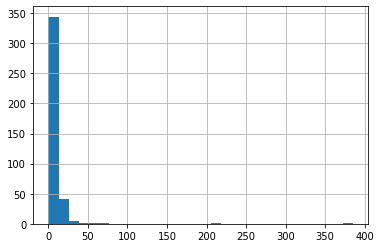

In [65]:
stud.absences.hist(bins=30)


In [66]:
stud.absences.describe()

count    395.000000
mean       7.270886
std       23.105146
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [67]:
# Количество "аномальных" значений
stud.absences[stud.absences>100].count()

2

In [68]:
# Заменяем "аномальные" значения на None
stud.absences = stud.absences.apply(lambda x: x if x < 100 else None)

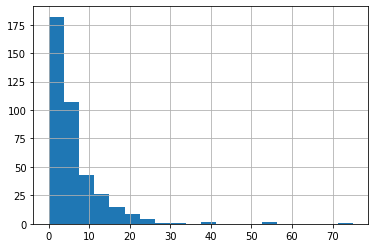

In [69]:
# Гистограмма 'absences'
stud.absences.hist(bins=20)

###### №29 Столбец "score" (баллы по госэкзамену по математике) содержит 6 пропусков, а также 37 записей без оценки (0 баллов за экзамен)

##### Т.к. данные невозможно использовать для построения модели, удалим эти 43 строки (6 пропусков и 37 без оценки)

In [70]:
# Определяем количество пропусков
len(stud['score']) - stud['score'].value_counts().sum()

6

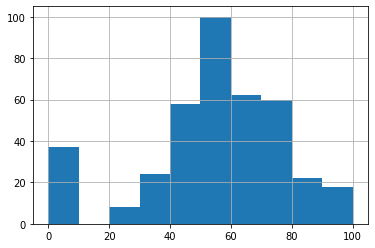

In [71]:
stud['score'].hist()

In [72]:
stud['score'].value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [73]:
# удаление пропусков
stud.dropna(subset=['score'], inplace=True)

In [74]:
# удаление строк без оценки (0 баллов за экзамен)
stud2 = stud.loc[stud.score != 0]

In [75]:
stud2.shape

(352, 30)

## Корреляционный анализ

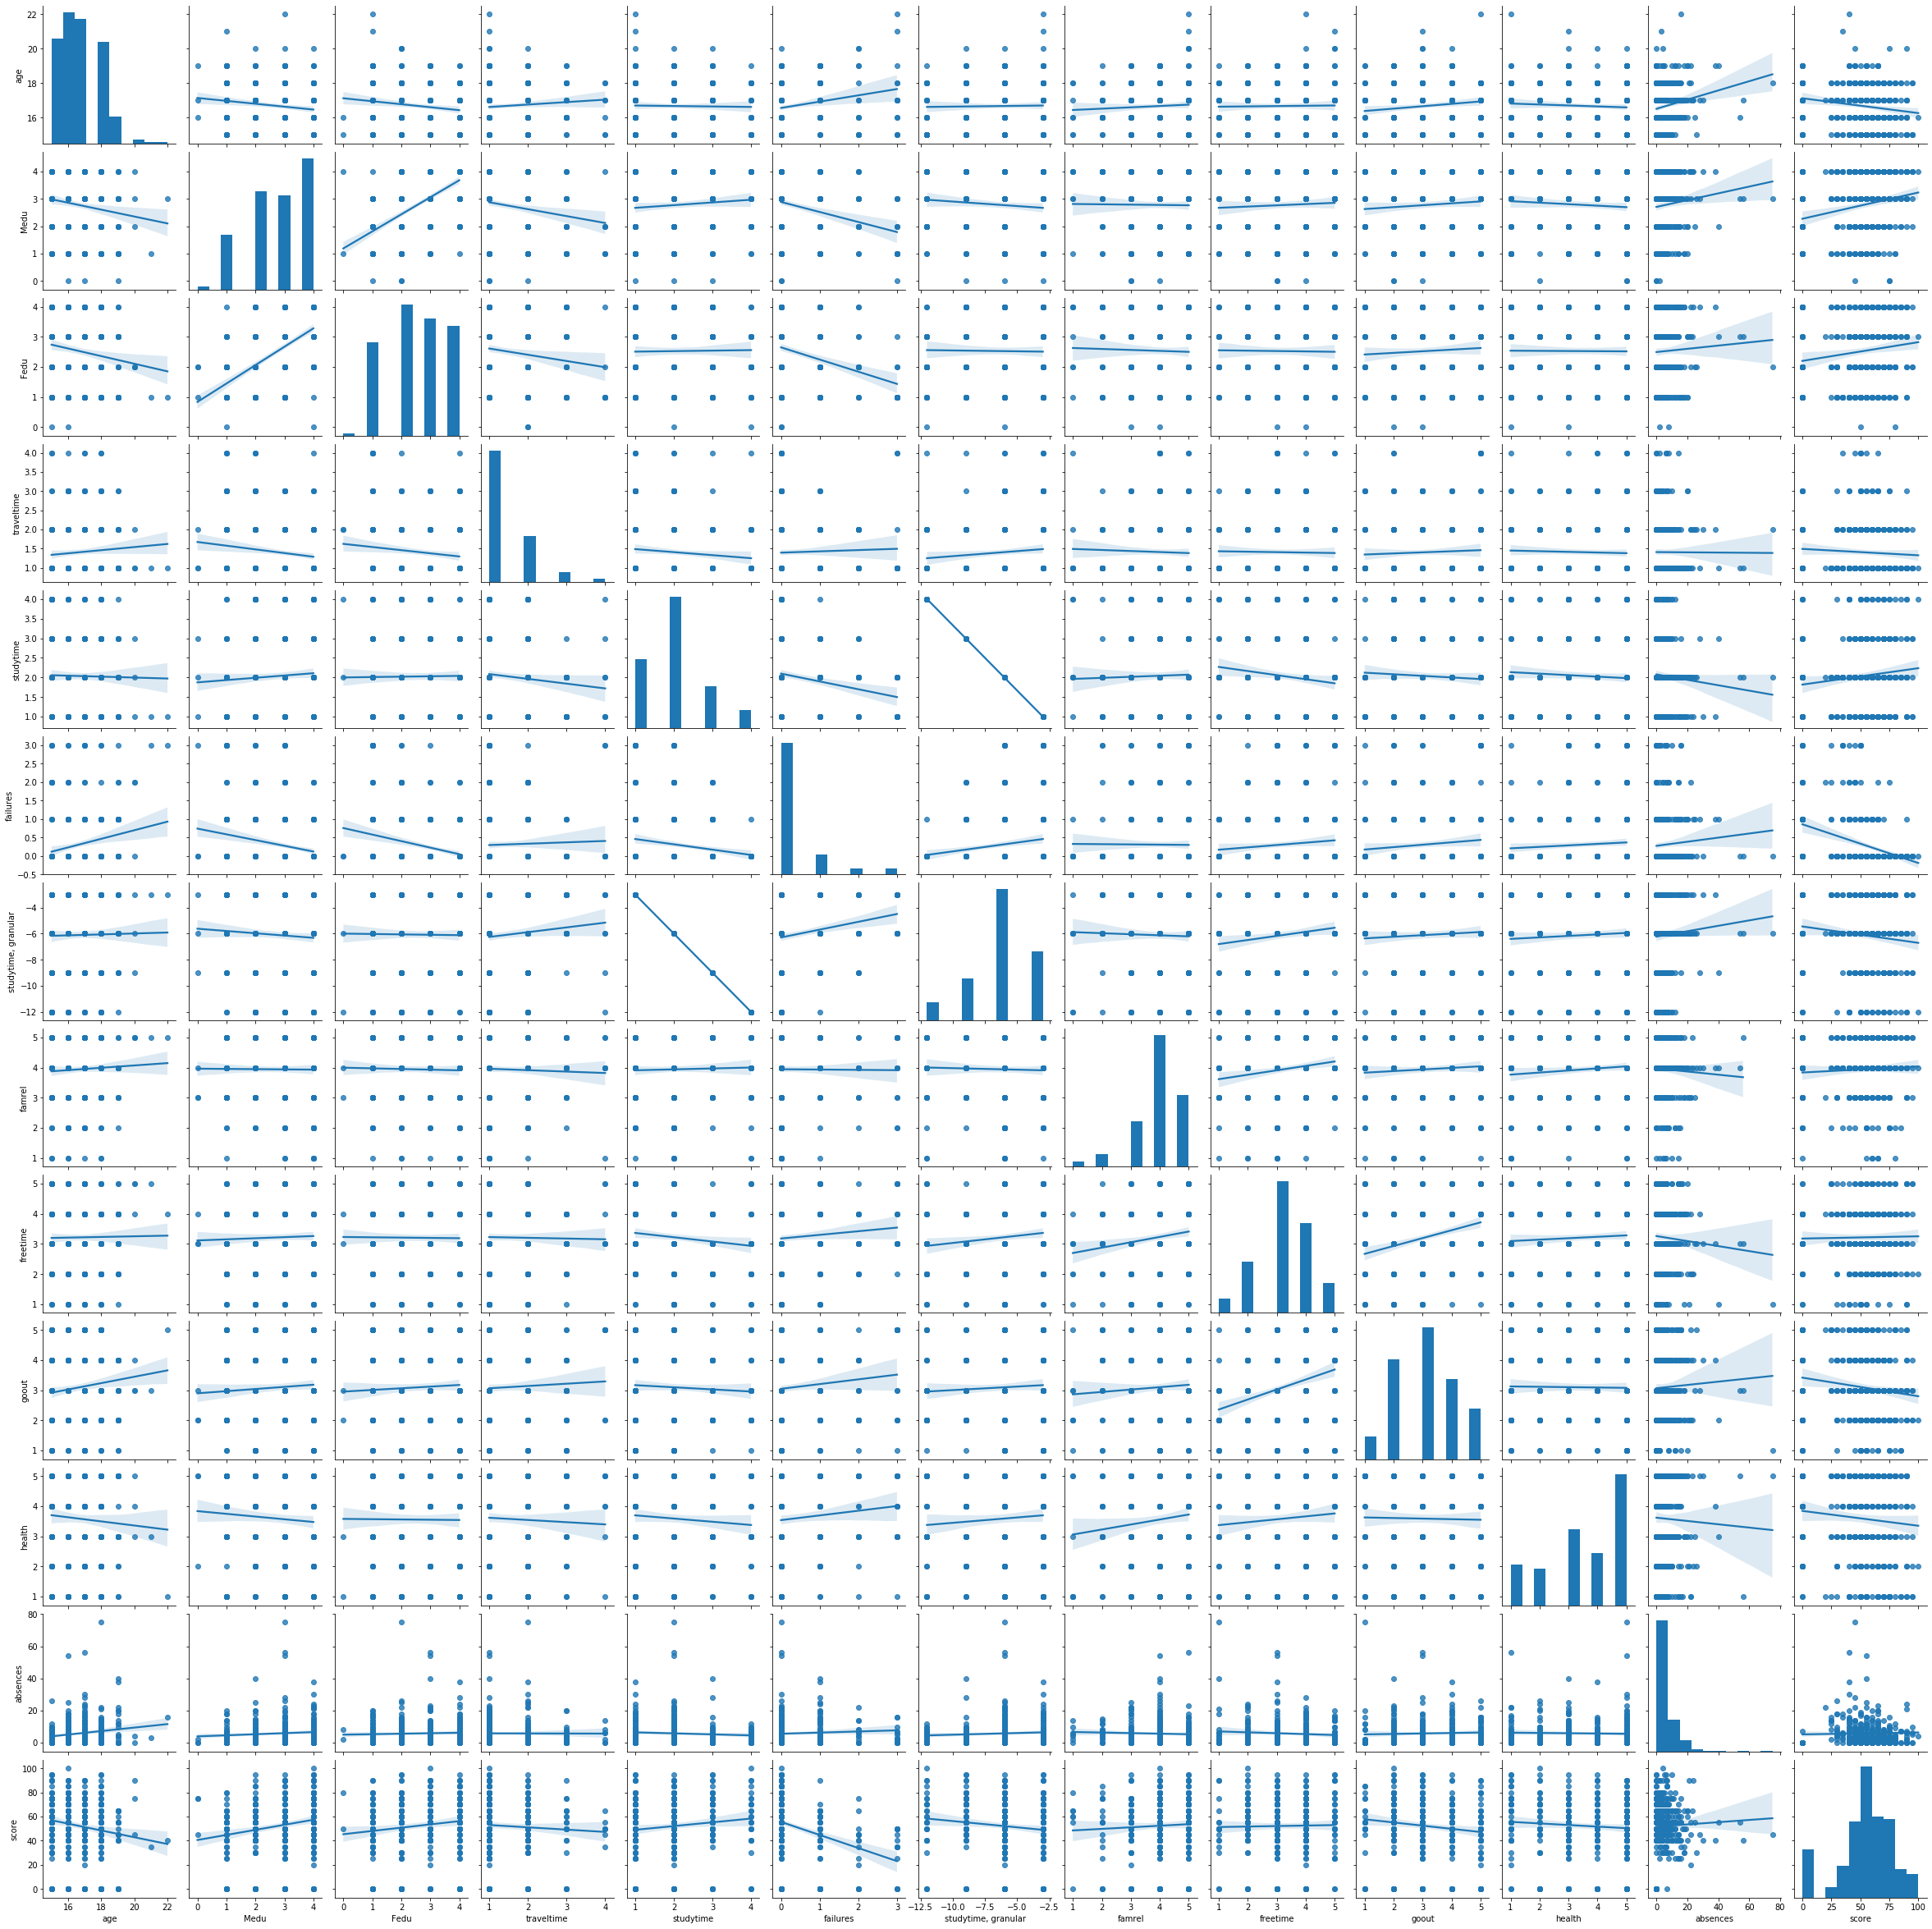

In [76]:
sns.pairplot(stud, kind = 'reg')

In [77]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.145755,-0.147952,0.076013,-0.018019,0.206279,0.018019,0.054846,0.013994,0.121057,-0.061752,0.170362,-0.155726
Medu,-0.145755,1.000000,0.616626,-0.156090,0.076035,-0.238295,-0.076035,-0.009540,0.040743,0.070310,-0.070420,0.090572,0.200890
Fedu,-0.147952,0.616626,1.000000,-0.130364,0.012942,-0.267197,-0.012942,-0.026481,-0.011184,0.054527,-0.007180,0.039763,0.130002
traveltime,0.076013,-0.156090,-0.130364,1.000000,-0.098226,0.035113,0.098226,-0.035694,-0.016696,0.046390,-0.035336,-0.003610,-0.056535
studytime,-0.018019,0.076035,0.012942,-0.098226,1.000000,-0.169399,-1.000000,0.028775,-0.122057,-0.053554,-0.063876,-0.065732,0.114295
failures,0.206279,-0.238295,-0.267197,0.035113,-0.169399,1.000000,0.169399,-0.008255,0.087558,0.101036,0.079030,0.062815,-0.337187
"studytime, granular",0.018019,-0.076035,-0.012942,0.098226,-1.000000,0.169399,1.000000,-0.028775,0.122057,0.053554,0.063876,0.065732,-0.114295
famrel,0.054846,-0.009540,-0.026481,-0.035694,0.028775,-0.008255,-0.028775,1.000000,0.161729,0.064717,0.106870,-0.042880,0.051219
freetime,0.013994,0.040743,-0.011184,-0.016696,-0.122057,0.087558,0.122057,0.161729,1.000000,0.294450,0.067629,-0.068157,0.017481
goout,0.121057,0.070310,0.054527,0.046390,-0.053554,0.101036,0.053554,0.064717,0.294450,1.000000,-0.015108,0.039592,-0.127742


###### Визуально корреляций на графике не наблюдается.
###### Из матрицы корреляций можно сделать вывод, что показатель "score" больше всего коррелирует со столбцами "failures", "Medu" и "age". Однако сила связи между переменными очень слабая.

### Анализ номинативных переменных

##### Определение распределения score в зависимости от значения номинативных переменных

In [78]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

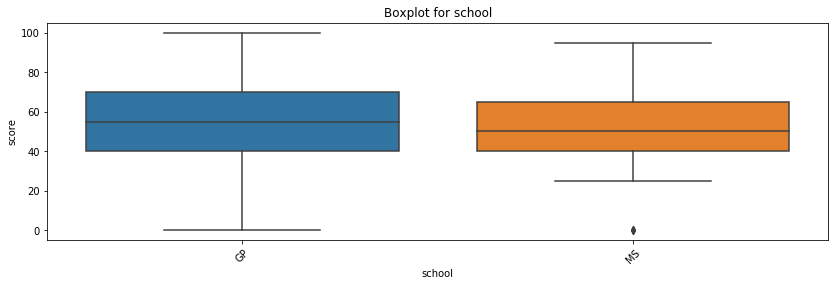

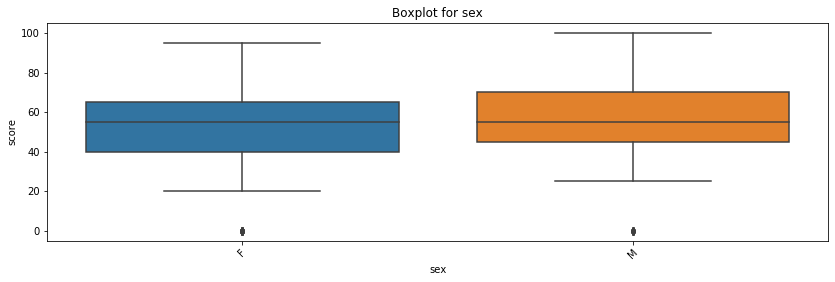

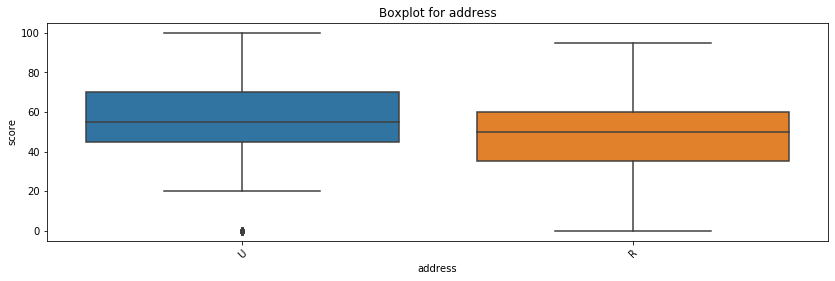

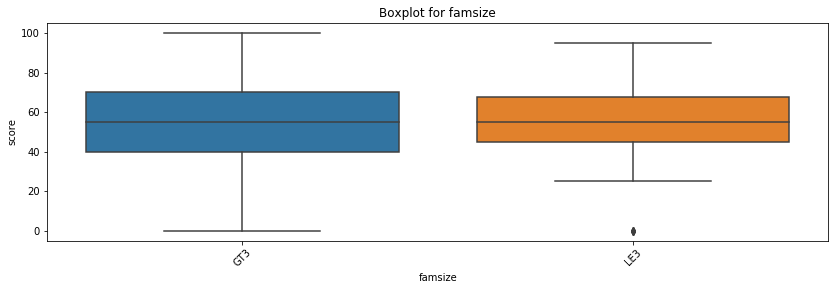

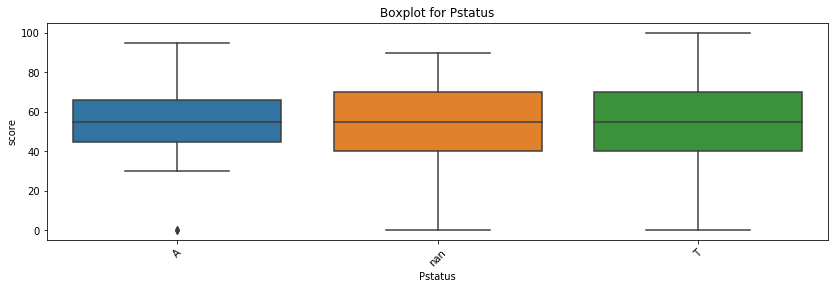

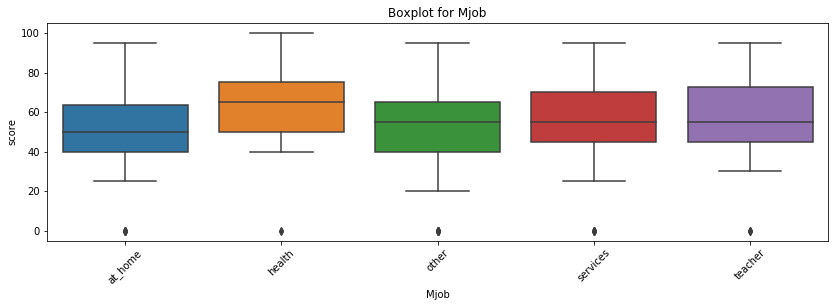

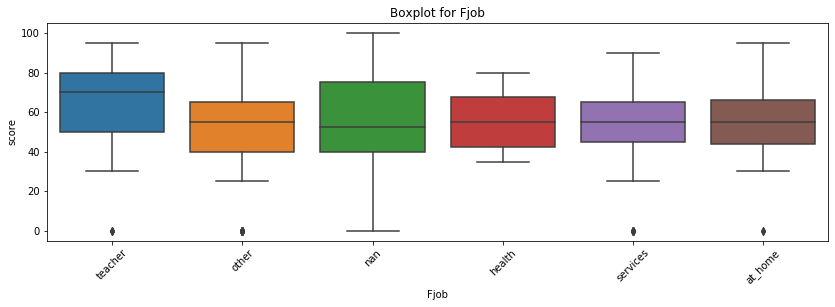

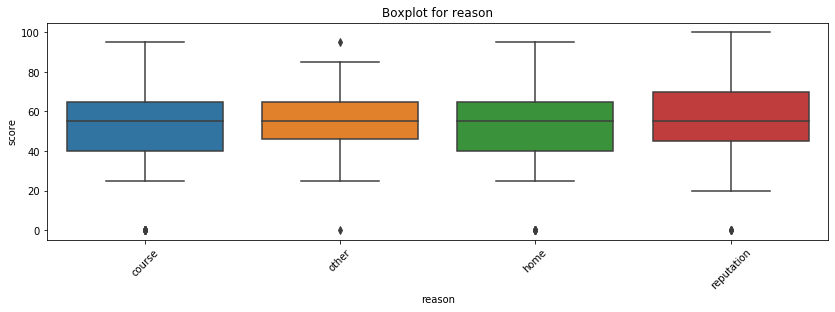

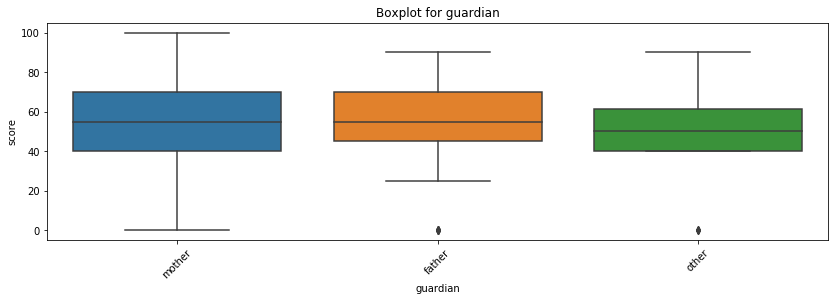

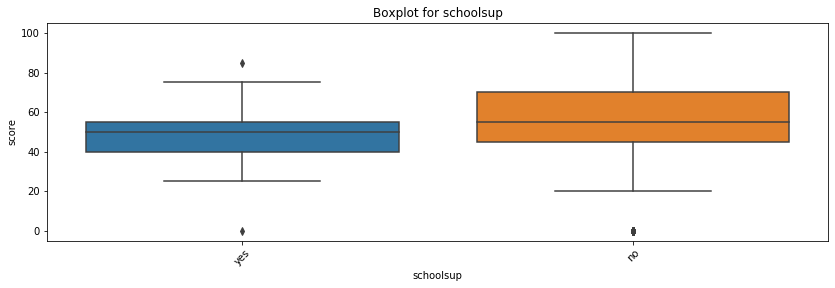

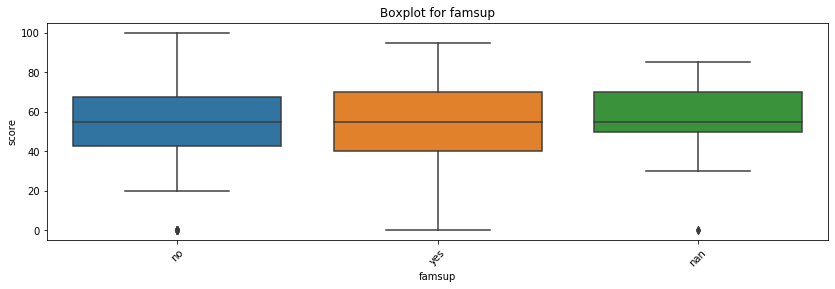

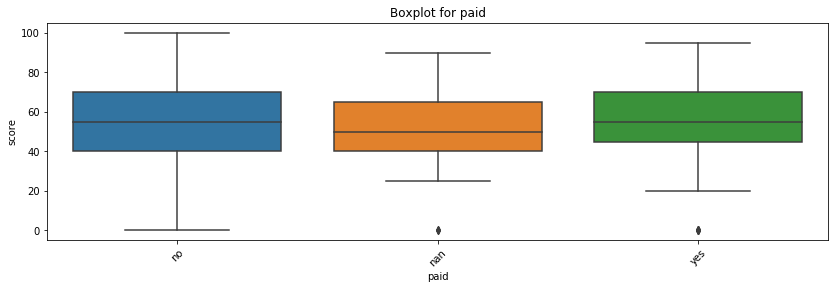

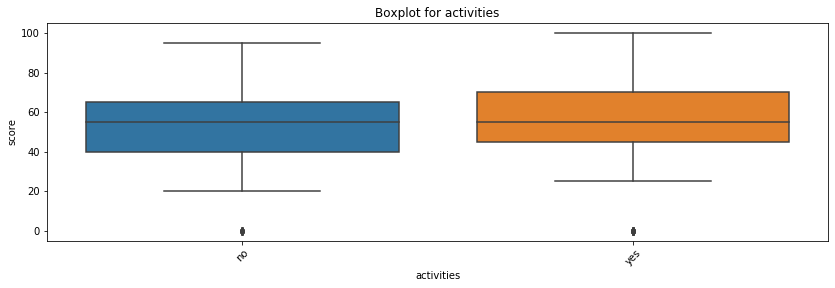

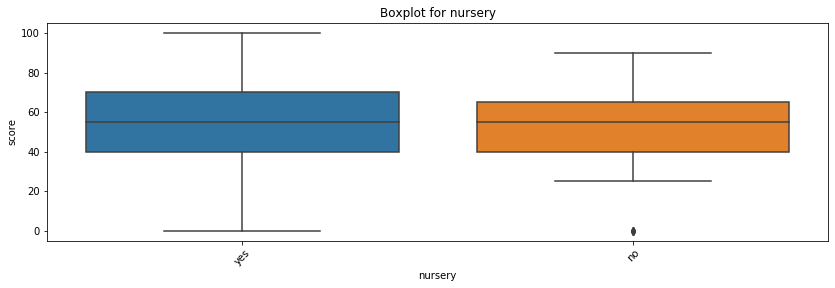

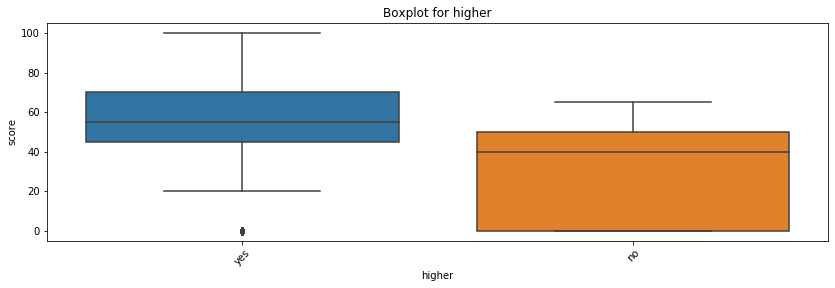

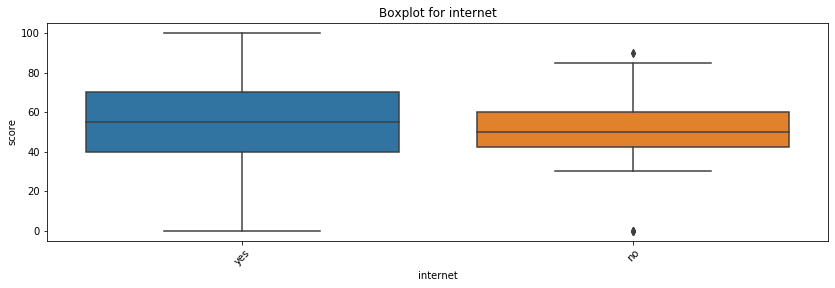

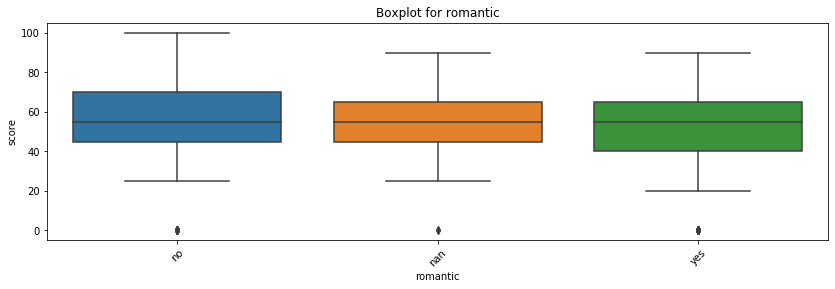

In [79]:
for column in stud.columns:
    if stud[column].dtype == 'O':
        get_boxplot(column)

По графикам следующие параметры: "famsize", "Pstatus", "famsup", "paid", "activities", "nursery" не коррелируют со "score"

In [80]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

#### Проверка наличия статистической разницы в распределении оценок по номинативным признакам, с помощью теста Стьюдента (Проверка нулевой гипотезе о том, что распределения оценок студентов по различным параметрам неразличимы):

In [81]:
warnings.simplefilter("ignore")

for column in stud.columns:
    if stud[column].dtype == 'O':
        get_stat_dif(column)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Удаление ненужныч столбцов:

In [82]:
stud.drop(columns=['famsize', 'Pstatus', 'famsup', 'paid', 'activities', 'nursery'], inplace=True)

### Датафрейм после очистки

In [83]:
stud.shape

(389, 24)

In [84]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              389 non-null    object 
 4   Medu                 389 non-null    float64
 5   Fedu                 364 non-null    float64
 6   Mjob                 389 non-null    object 
 7   Fjob                 389 non-null    object 
 8   reason               389 non-null    object 
 9   guardian             389 non-null    object 
 10  traveltime           389 non-null    float64
 11  studytime            389 non-null    float64
 12  failures             389 non-null    float64
 13  schoolsup            389 non-null    object 
 14  studytime, granular  389 non-null    float64
 15  higher               389 non-null    obj

### Выводы:
1. В исходном датасете было 395 строк в 30 колонках
2. Данные в каждом столбце были проанализированы на наличие пропусков и выбросов:
   В заваисимости от их количества либо были заменены на наиболее часто встречающийся вариант, либо заменены на None
3. В 43 строках отсутствовали данные об оценке на экзамене - это строки были удалены (6 пропусков и 37 строк с 0 баллом)
4. Данные в столбцах 'famsize', 'Pstatus', 'famsup', 'paid', 'activities', 'nursery' не коррелируют со 'score'
   Эти столбцы были удалены
5. После преобразований в датасете остались 352 строки в 24 столбцах
6. Наибольшая корреляция со 'score' имеют следующие столбцы: "failures", "Medu" и "age".
   Однако сила связи между переменными очень слабая.